In [70]:
import matplotlib.pyplot as plt
import numpy as np


In [71]:
BUCKET_SIZE = 60

session = "women_tree_schaut_nach_links"

hdrvdp_matrix_name = "0_08_alias_0272_vdp_hdrvdp_matrix"
cnn_matrix_name = "0_25_alias_0272_cnn_matrix"

READ_PATH = f"D:\\Main\\MA_PROGR\\Data\\Test\\HDR_VDP_CNN_Regr_Session\\{session}"
WRITE_PATH = "D:\\Main\\MA_PROGR\\Data\\Test\\HDR_VDP_CNN_Regr_Session"


hdrvdp_matrix = np.load(f"{READ_PATH}\\{hdrvdp_matrix_name}.npy")
cnn_matrix = np.load(f"{READ_PATH}\\{cnn_matrix_name}.npy")


print(cnn_matrix)


[[0.07058824 0.08627451 0.08627451 0.08235294 0.1254902  0.5372549
  0.49019608 0.03137255 0.70196078 0.44313725 0.05098039 0.74509804
  0.75294118 0.75686275 0.74117647 0.75294118 0.75686275 0.74509804
  0.35686275 0.7372549  0.70196078 0.04705882 0.05882353 0.02745098
  0.66666667 0.4745098  0.0627451  0.32941176 0.07843137 0.48235294
  0.70196078 0.70980392]
 [0.69803922 0.42745098 0.08627451 0.31372549 0.48235294 0.66666667
  0.72156863 0.74117647 0.74117647 0.05882353 0.63137255 0.75294118
  0.71764706 0.75294118 0.73333333 0.74509804 0.65098039 0.73333333
  0.22745098 0.18823529 0.40392157 0.69803922 0.68235294 0.65882353
  0.72156863 0.28235294 0.22745098 0.63137255 0.38039216 0.45098039
  0.49019608 0.58823529]
 [0.62352941 0.63529412 0.65882353 0.63921569 0.4745098  0.71372549
  0.64705882 0.64705882 0.74509804 0.74509804 0.75294118 0.75686275
  0.76470588 0.74509804 0.75686275 0.78039216 0.76078431 0.75686275
  0.68627451 0.70196078 0.58431373 0.71764706 0.52941176 0.67843137

In [72]:
x_values = [x for x in range(32)]
y_values = [x for x in range(18)]


In [73]:
X, Y = np.meshgrid(x_values, y_values)

In [74]:
# X

In [75]:
# Y

In [76]:
# plt.scatter(X, Y)

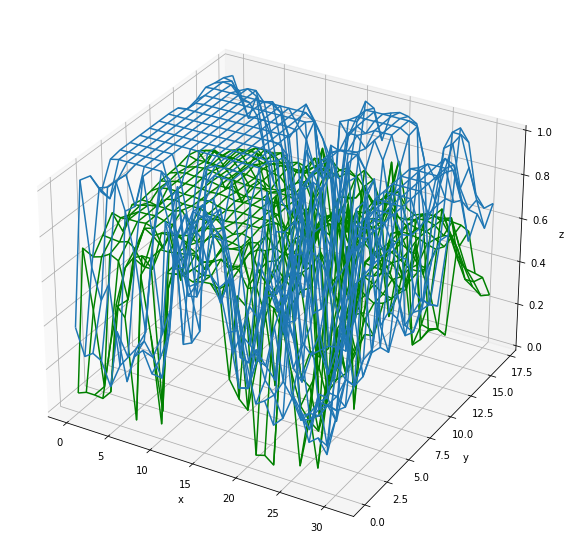

In [77]:
plt.rcParams["figure.figsize"] = (15, 10)
ax = plt.axes(projection="3d")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")


ax.plot_wireframe(X, Y, hdrvdp_matrix)
ax.plot_wireframe(X, Y, cnn_matrix, color="green")


## Weitere Idee: Differenzmatrix

Matrizen voneinander abziehen und eine Ergebnismap ausgeben. 
Farblich kennzeichnen, ob HDRVDP höhere Wahrscheinlichkeit für visuelle Wahrnehmbarkeit als CNN oder niedrigere vorhersagt

# TODO: Matrizen aneinander angleichen!?

In [78]:
cnn_matrix.max()

1.0

In [79]:
hdrvdp_matrix.max()

1.0

In [80]:
differenzmatrix = hdrvdp_matrix - cnn_matrix
differenzmatrix.min()

-0.7810250544662305

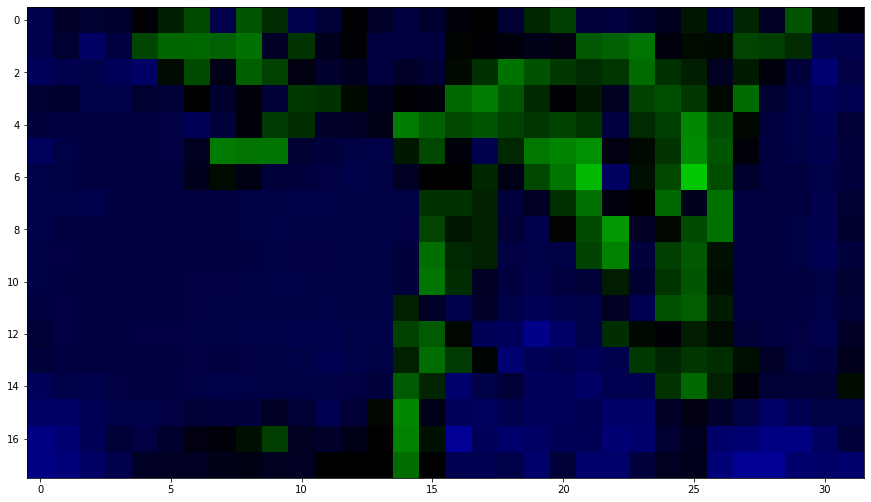

In [81]:
differenzmatrix_img = np.zeros((18, 32, 3))


for y in range(18):
    for x in range(32):
        current_value = differenzmatrix[y][x]
        current_color = [0,0,0]

        if current_value == 0:
            # hdrvdp und CNN sind zum gleichen Ergebnis gekommen -> schwarz
            current_color = [0,0,0]

        if current_value > 0:
            # hdrvdp ist zu größerem Ergebnis gekommen -> blau
            blue_channel = abs(current_value)
            current_color = [0,0,blue_channel]

        if current_value < 0:
            # cnn ist zu größerem Ergebnis gekommen -> grün
            green_channel = abs(current_value)
            current_color = [0,green_channel,0]
        
        differenzmatrix_img[y][x] = current_color


plt.imshow(differenzmatrix_img)
plt.show()







In [82]:
# plt.imsave(f"{WRITE_PATH}\\{session}\\differenzmatrix_img.png", differenzmatrix_img)
